In [1]:
import cv2
import os
from matplotlib import  pyplot as plt 
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Define function for loading dataset and displaying some sample 

### In this work, we are using only thumb finger left and rigth from our dataset

In [4]:
def load_datasets(dataset_path):

  _columns = ('images', 'gender', 'hand', 'finger', 'id_num')
  dataset = pd.DataFrame(columns = _columns)

  path_folder = dataset_path + '/' 
 
  for filename in os.listdir(dataset_path):
    
    pers_id = str.split(str(filename), '__')
    autre = str.split(pers_id[1], '.')
    finger_infos = str.split(autre[0], '_')

    path_file = path_folder + filename
    img = cv2.imread(path_file, 0)
    img = cv2.resize(img, (96, 103))

    if finger_infos[2] == 'thumb':
      dic = dict()
      dic['images'] = img
      dic['id_num'] = int(pers_id[0])
      dic['gender'] = finger_infos[0]
      dic['hand'] = finger_infos[1]
      dic['finger'] = finger_infos[2]
      
      dataset = dataset.append(dic, ignore_index=True)

  dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
  print('Data infos: {}'.format(dataset.shape))

  return dataset

In [5]:
def displaySample(data = None, nb_line = None,nb_columns = None):
  fig, ax = plt.subplots(nb_columns, nb_line, sharex=True, sharey=True, figsize=(10,10))
  k = 0
  for i in range(nb_line):
    for j in range(nb_columns):
      ax[i,j].imshow(data['images'][j + k], cmap="gray")
      ax[i,j].set_title(str(data['id_num'][j + k]) + '__' + data['gender'][j + k]
                        + '_' + data['hand'][j + k] + '_' + data['finger'][j + k])
      
    k = k + nb_columns

  plt.show()

# UnZip file dataset from drive using zipfile library or unzip

###### We will use only thumb fingerprint

In [6]:
#import zipfile

#_zipfile = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing.zip', 'r')
#_zipfile.extractall('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/')
#_zipfile.close( )


#!unzip -uq "/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing.zip" -d "/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/"

# Load real fingerprint dataset

#### synthetically altered versions of these fingerprints are provided with three different levels of alteration for obliteration, central rotation, and z-cut using the STRANGE toolbox.

#### Load real dataset

In [7]:
#real_data= load_datasets('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing/Real')
real_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/real_data.pkl')
real_data.shape

(1200, 5)

In [8]:
# save in pickle format
#real_data.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/real_data.pkl')

In [9]:
real_data.head(100)

,images,gender,hand,finger,id_num
0,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",F,Right,thumb,173
1,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",F,Right,thumb,201
2,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,564
3,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,370
4,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",F,Left,thumb,56
...,...,...,...,...,...
95,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,306
96,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,409
97,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",F,Left,thumb,240
98,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,473


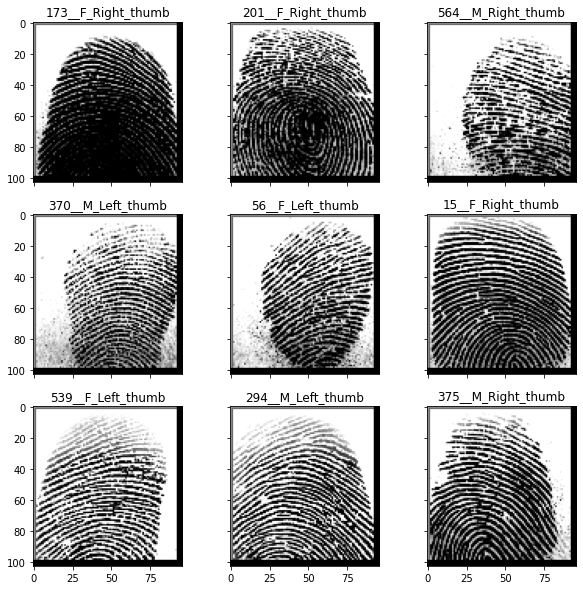

In [10]:
displaySample(data=real_data, nb_line=3, nb_columns=3)

### Load altered fingerprint dataset (easy altered)

In [11]:
#easy_altered_data = load_datasets('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing/Altered/Altered-Easy')
easy_altered_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/easy_altered_data.pkl')
easy_altered_data.shape

(3585, 5)

In [12]:
# save in pickle format
#easy_altered_data.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/easy_altered_data.pkl')

In [13]:
easy_altered_data.head(100)

,images,gender,hand,finger,id_num
0,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,193
1,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",F,Left,thumb,173
2,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,509
3,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,97
4,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,212
...,...,...,...,...,...
95,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,100
96,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,264
97,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,408
98,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",F,Left,thumb,574


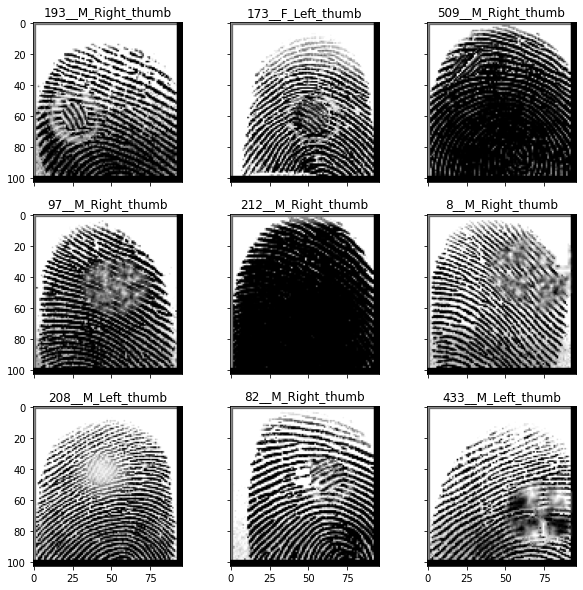

In [14]:
displaySample(data=easy_altered_data, nb_line=3, nb_columns=3)

### load altered fingerprint dataset (medium altered)

In [15]:
#medium_altered_data = load_datasets('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing/Altered/Altered-Medium')
medium_altered_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/medium_altered_data.pkl')
medium_altered_data.shape

(3459, 5)

In [16]:
# save in pickle format
#medium_altered_data.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/medium_altered_data.pkl')

In [17]:
medium_altered_data.head(100)

,images,gender,hand,finger,id_num
0,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,513
1,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,552
2,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,23
3,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,347
4,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",F,Right,thumb,25
...,...,...,...,...,...
95,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,495
96,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,138
97,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",F,Left,thumb,550
98,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,583


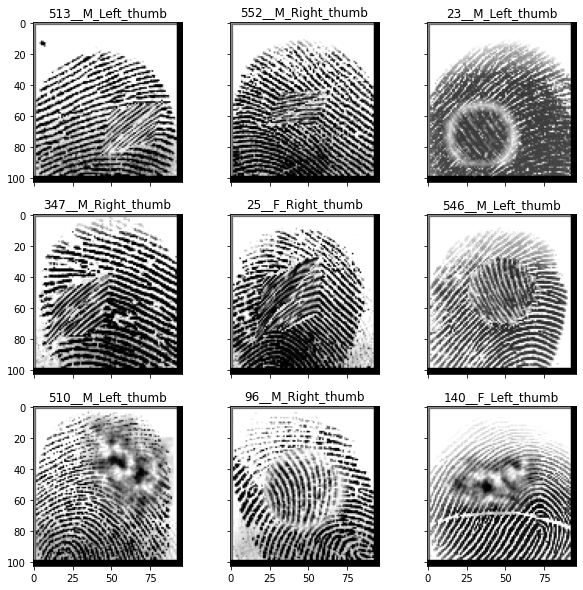

In [ ]:
displaySample(data=medium_altered_data, nb_line=3, nb_columns=3)

### load altered fingerprint dataset (hard altered)

In [ ]:
#hard_altered_data = load_datasets('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing/Altered/Altered-Hard')
hard_altered_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/hard_altered_data.pkl')
hard_altered_data.shape

(3084, 5)

In [ ]:
# save in pickle format
#hard_altered_data.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/hard_altered_data.pkl')

In [ ]:
hard_altered_data.head(100)

,images,gender,hand,finger,id_num
0,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,408
1,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,200
2,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,322
3,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,546
4,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,347
...,...,...,...,...,...
95,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,520
96,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,546
97,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,52
98,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,434


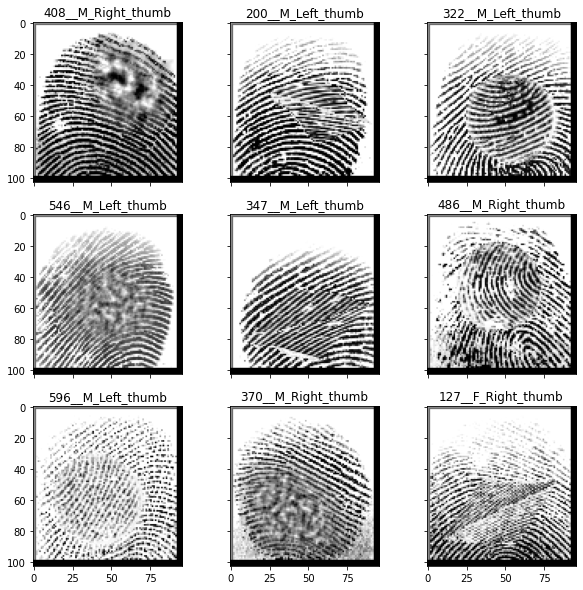

In [ ]:
displaySample(data= hard_altered_data, nb_line=3, nb_columns=3)

### Load personal data


In [ ]:
private_data = load_datasets('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/PersonalData')

Data infos: (4, 5)


In [ ]:
private_data.head()

,images,gender,hand,finger,id_num
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",M,Right,thumb,601
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",M,Right,thumb,602
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",M,Left,thumb,601
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",M,Left,thumb,602


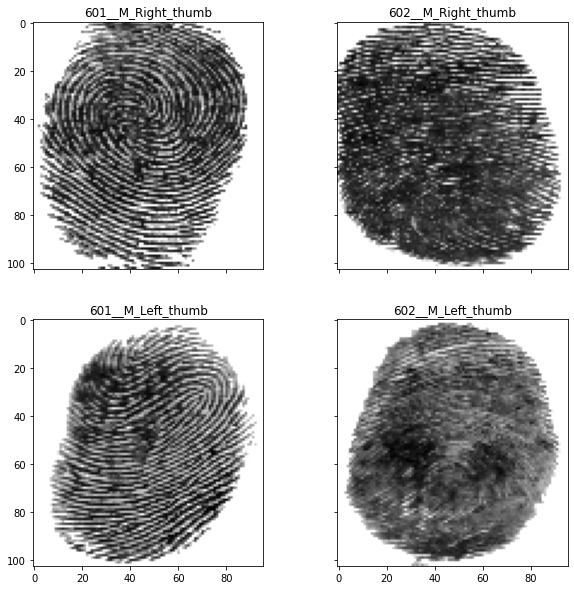

In [ ]:
displaySample(data= private_data, nb_line=2, nb_columns=2)

# Dats augmented function

# Merge all datasets (thumb grayscale images ) 

In [ ]:
df = [real_data, easy_altered_data, medium_altered_data, hard_altered_data, private_data]

In [ ]:
dataset = pd.concat(df, ignore_index=True)
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# save merge dataset 
dataset.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/merge_data.pkl')

In [ ]:
dataset.shape

(11332, 5)

In [ ]:
dataset.head(100)

,images,gender,hand,finger,id_num
0,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",F,Right,thumb,142
1,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,363
2,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,545
3,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",F,Right,thumb,43
4,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",F,Left,thumb,130
...,...,...,...,...,...
95,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,89
96,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Right,thumb,538
97,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,395
98,"[[160, 160, 160, 160, 160, 160, 160, 160, 160,...",M,Left,thumb,238


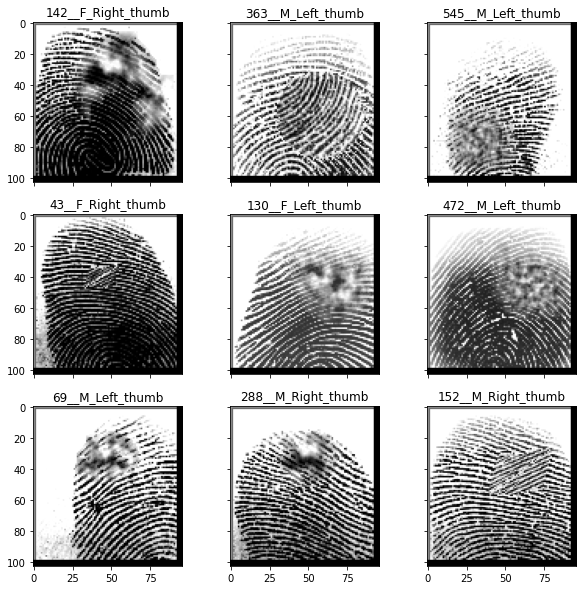

In [ ]:
displaySample(data=dataset, nb_line=3, nb_columns=3)

# Preprocessing Data & features extraction for further tasks

In [ ]:
dataset['images'][0].shape

(103, 96)

### Gabor algorithm for fingerprint image enhancement task

In [ ]:
# Gabor Kernel parameters

ksize = 7  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 1 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/2  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lambd = 1*np.pi/4  #1/4 works best for angled. 
gamma= 1  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 1 #Phase offset. I leave it to 0. 

def GaborFilter(img):

  #th, im_gray_th_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  kernel = cv2.getGaborKernel((ksize,ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)
  img_filtered = cv2.filter2D(img, cv2.CV_8UC3, kernel)

  kernel_resize = cv2.resize(kernel, (103, 96))
  fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,10))

  ax[0].imshow(kernel_resize, cmap="gray")
  ax[0].set_title('Kernel')

  ax[1].imshow(img, cmap="gray")
  ax[1].set_title('Original image')

  ax[2].imshow(img_filtered, cmap="gray")
  ax[2].set_title('image filtered')

  plt.show()

### Use finger_enhancer library to enhance all our images 


##### The method is based on a bank of Gabor filter. The orientation of the gabor filters is decided by the orientation of ridges in the input image.

###### @Utkarsh-Deshmukh
https://github.com/Utkarsh-Deshmukh/Fingerprint-Enhancement-Python

In [9]:
!pip install fingerprint_enhancer

     |████████████████████████████████| 14.6MB 303kB/s 
  Created wheel for fingerprint-enhancer: filename=fingerprint_enhancer-0.0.11-cp36-none-any.whl size=8046 sha256=6baca2a9cd84f20d42800f8cda93e0de4b41fd24dd8487dbb84f135609d0acd8
  Stored in directory: /root/.cache/pip/wheels/88/45/5c/3d34ba8efab7e215b7e8cb712752e2aa24ef12cb7e75fc6d22
Successfully built fingerprint-enhancer
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.19.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [ ]:
#!pip install fingerprint_enhancer 
import fingerprint_enhancer 

In [ ]:
img = easy_altered_data['images'][4]

In [ ]:
def displayresult(img_origine = None, img_result = None, method = None):
  fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6,6))

  ax[0].imshow(img_origine, cmap="gray")
  ax[0].set_title('Original image')
  
  ax[1].imshow(img_result, cmap="gray")
  ax[1].set_title(method)

  plt.show()

####__step__1 Smothing image

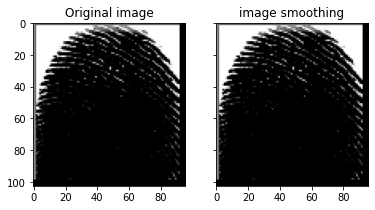

In [ ]:
gauss_blur = cv2.GaussianBlur(img,(1,1),0)
displayresult(img_origine=img, img_result=gauss_blur, method='image smoothing')

#### __step__2 Fingerprint enhancement using finger_enhancement library

(350, 326)


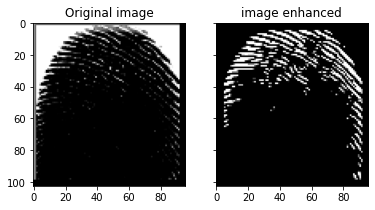

In [ ]:
out = fingerprint_enhancer.FingerprintImageEnhancer()	
rs =out.enhance(gauss_blur)	# enhance the fingerprint image
print(rs.shape)
rs = cv2.resize(rs, (96, 103))
displayresult(img_origine=gauss_blur, img_result=rs, method='image enhanced')

#### __step__3 Edge detection

In [ ]:
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

def detect_ridges(gray, sigma= 0.1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

In [ ]:
def preprocessing(dataset = dataset):
  out = fingerprint_enhancer.FingerprintImageEnhancer()	
  for index, img in enumerate((dataset['images'].values.tolist())):
    img = cv2.GaussianBlur(img,(1,1),0)
    rs =out.enhance(img)
    rs = cv2.resize(rs, (96, 103))
    dataset['images'][index] = rs
  
  return dataset

In [ ]:
# preprocessing dataset to enhance image
#dataset = preprocessing()

In [ ]:
# save merge dataset 
#dataset.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/merge_dataset_enhance.pkl')

In [ ]:
dataset = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/merge_dataset_enhance.pkl')
dataset.shape

(11332, 5)

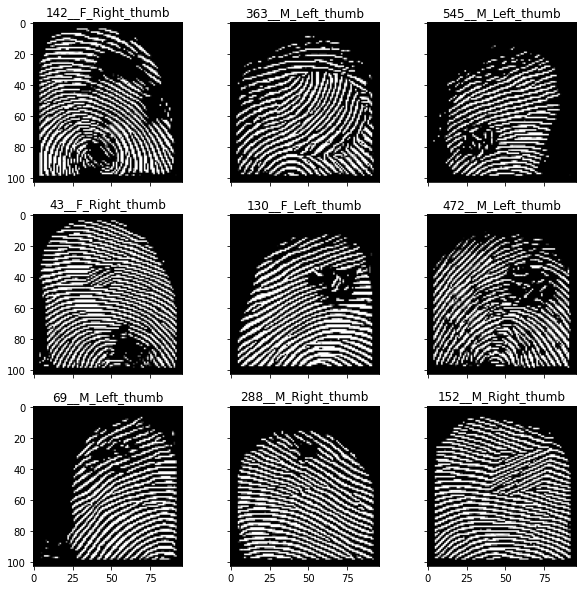

In [ ]:
displaySample(data=dataset, nb_line=3, nb_columns=3)

In [ ]:
np.array(dataset['images']).shape

(11332,)

# Split our dataset into train, val and test set 

###### Overview our labels

In [ ]:
np.sort(dataset['id_num'].unique())

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 

In [ ]:
len(dataset['id_num'].unique())

602

##### Extract raws images and labels in our dataset dataframe

In [ ]:
images_set = np.array(dataset['images'].values.tolist())
labels_set = np.array(dataset['id_num'].values.tolist())
num_classes = len(dataset['id_num'].unique()) 

#### Splitting our dataset, 70% train set, 21% test set and 9% validation set

In [ ]:
from sklearn.model_selection import  train_test_split

# split into train and test set
X_train,  X_test, Y_train, Y_test = train_test_split(images_set, labels_set, train_size=0.7, test_size=0.3, random_state=10)

# resplit train into final train and val set
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, train_size=0.7, test_size=0.3, random_state=10)

In [ ]:
print("Train & labels shape: {}, {}\nTest & labels shape: {}, {}\nVal & labels shape: {}, {}".format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape))

Train & labels shape: (7932, 103, 96), (7932,)
Test & labels shape: (2380, 103, 96), (2380,)
Val & labels shape: (1020, 103, 96), (1020,)


In [ ]:
X_train.shape

(7932, 103, 96)

In [ ]:
X_train.shape

(7932, 103, 96)

In [ ]:
np.sort(Y_train)

array([  1,   1,   1, ..., 601, 601, 602])

In [ ]:
np.sort(Y_test)

array([  1,   1,   1, ..., 600, 600, 602])

In [ ]:
np.sort(Y_val)

array([  1,   1,   1, ..., 599, 599, 600])

# Let create our deep learning model

#### Initialize hyperparameters 

In [ ]:
epochs = 100
batch_size = 64
input_width = 96
input_height = 103

#### Prepare data for training model, reshape split sets and encode labels in onehot encoding

In [ ]:
X_train = X_train.reshape(X_train.shape[0], input_height, input_width, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], input_height, input_width, 1)
X_test = X_test.astype('float32')
X_val = X_val.reshape(X_val.shape[0], input_height, input_width, 1)
X_val = X_val.astype('float32')

# Onehot encoding

from keras.utils.np_utils import to_categorical
Y_train = tf.one_hot(Y_train, num_classes)
Y_test = tf.one_hot(Y_test, num_classes)
Y_val = tf.one_hot(Y_val, num_classes)

train_size = len(X_train)

In [ ]:
!pip install -q pyyaml h5py

#### Create our deep learning model

In [ ]:
import tensorflow as tf

filter = (3, 3)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=filter, activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=1024, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Conv2D(filters=1024, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 4096, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = generator.flow(X_train, Y_train, batch_size=batch_size)
val_generator = generator.flow(X_val, Y_val, batch_size=batch_size)

filepath = "/content/drive/My Drive/Colab Notebooks/FingerPrint_Recognition/Output/model.hdf5"
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=0, mode='min', patience = 10)
reduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=1, min_lr=1e-9, verbose=1)
mcp_save = tf.keras.callbacks.ModelCheckpoint(filepath, save_best_only=True, monitor='val_loss', mode='min')


adam = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy'
, optimizer=adam
, metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 103, 96, 32)       320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 103, 96, 32)       9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 103, 96, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 51, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 51, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 51, 48, 64)        2

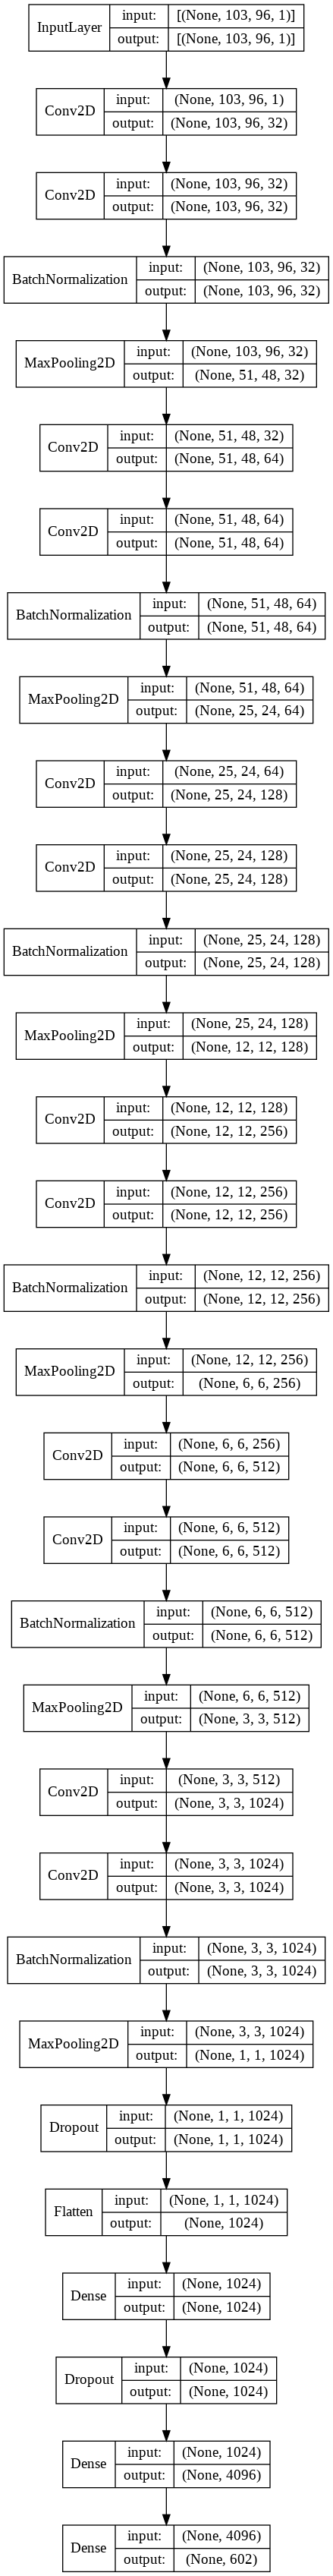

In [ ]:
tf.keras.utils.plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Output/modelArch.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96)

#### Model fitting

In [ ]:
histories = model.fit(train_generator,validation_data=val_generator, steps_per_epoch=train_size//batch_size, epochs=epochs, validation_steps = (len(X_val))//batch_size, verbose=1, callbacks=[earlyStopping])

Epoch 1/100
123/123 [==============================] - 24s 115ms/step - loss: 9.9322 - accuracy: 0.0015 - val_loss: 9.5201 - val_accuracy: 0.0000e+00
Epoch 2/100
123/123 [==============================] - 13s 102ms/step - loss: 9.1753 - accuracy: 0.0098 - val_loss: 9.5842 - val_accuracy: 0.0010
Epoch 3/100
123/123 [==============================] - 13s 104ms/step - loss: 7.9713 - accuracy: 0.0416 - val_loss: 10.9491 - val_accuracy: 0.0010
Epoch 4/100
123/123 [==============================] - 13s 104ms/step - loss: 6.2793 - accuracy: 0.2018 - val_loss: 12.4068 - val_accuracy: 0.0010
Epoch 5/100
123/123 [==============================] - 13s 105ms/step - loss: 4.5123 - accuracy: 0.5099 - val_loss: 9.4887 - val_accuracy: 0.0250
Epoch 6/100
123/123 [==============================] - 13s 106ms/step - loss: 3.4566 - accuracy: 0.7417 - val_loss: 4.9969 - val_accuracy: 0.4302
Epoch 7/100
123/123 [==============================] - 13s 107ms/step - loss: 2.9479 - accuracy: 0.8688 - val_loss: 3.

#### Model evaluate on train & test set

In [ ]:
train_set = X_train / 255
test_set = X_test / 255

train_score = model.evaluate(train_set, Y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

test_score = model.evaluate(test_set, Y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 1.636988878250122
Train accuracy: 92.15834736824036
Test loss: 2.3255226612091064
Test accuracy: 87.81512379646301


In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/FingerPrint_Recognition/Output/model.h5", save_format="h5")

#### Visualize the training curves

In [ ]:
histories.history

{'accuracy': [0.0017793594161048532,
  0.011565836146473885,
  0.058973055332899094,
  0.2513980567455292,
  0.5585917830467224,
  0.7639806866645813,
  0.8765887022018433,
  0.9119216799736023,
  0.9293339848518372,
  0.9471275806427002,
  0.9457570910453796,
  0.9570412039756775,
  0.9588205218315125,
  0.9594560265541077,
  0.9647940993309021,
  0.959964394569397,
  0.9698779582977295,
  0.971276044845581,
  0.9700050950050354,
  0.9698779582977295,
  0.9721657633781433,
  0.9675902128219604,
  0.9745805859565735,
  0.971403181552887,
  0.973690927028656,
  0.9781504273414612,
  0.9763599634170532,
  0.9789018630981445,
  0.9768683314323425,
  0.9763599634170532,
  0.9750889539718628,
  0.9804270267486572,
  0.9768683314323425,
  0.980172872543335,
  0.9768683314323425,
  0.9769954085350037,
  0.9818251132965088,
  0.9772496223449707,
  0.9839857816696167,
  0.9820793271064758,
  0.9781392812728882,
  0.9805541634559631,
  0.982460618019104,
  0.9811896085739136,
  0.982587695121765

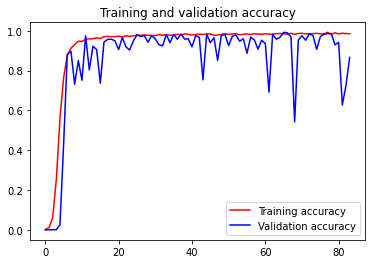

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = histories.history['accuracy']
val_acc = histories.history['val_accuracy']
loss = histories.history['loss']
val_loss = histories.history['val_loss']
#prec = histories.history['precision']
#val_prec = histories.history['val_precision']
#recall = histories.history['recall']
#val_recall = histories.history['val_recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

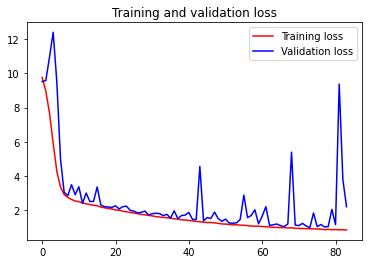

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Build corresponding predict label function

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.9215412e-34, 0.0000000e+00, 1.3824210e-32,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       6.3867946e-23, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.4001418e-17, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       9.9561202e-37, 0.0000000e+00, 3.0231352e-19, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.6119402e-29,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.7852439e-14,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.2307022e-29, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.5415546e-25, 0.0000000e+00, 0.0000000e

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1) + 1
y_pred_labels

array([ 80,  18,  21, ..., 489, 508, 569])

In [ ]:
np.sum(y_pred[100])

1.0

In [ ]:
y_true_labels = np.argmax(Y_test, axis=1) + 1
y_true_labels

array([162,  18,  21, ..., 267, 508, 569])

# Evaluate Model : Confusion matrix & Classification report 



#### Draw confusion matrix


In [ ]:
############## Draw confusion matrix

#@reuse from  Dennis Trimarchi github

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true_labels, y_pred_labels )
cf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 4, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 2]])

In [ ]:
class_labels = [str(i) for i in range(1, len(cf_matrix) + 1)]

In [ ]:
#_labels = ['True Neg','False Pos','False Neg','True Pos']
#make_confusion_matrix(cf_matrix, group_names=_labels,categories=class_labels, figsize=(10,10), cmap='binary')

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    #http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}\n misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
#plot_confusion_matrix(cf_matrix, class_labels, title='Confusion matrix')

In [ ]:
#make_confusion_matrix(cf_matrix, figsize=(10, 10))

In [ ]:
#sns.heatmap(cf_matrix)

In [ ]:
#sns.heatmap(cf_matrix/np.sum(cf_matrix), fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
class_labels = [str(i) for i in range(1, len(cf_matrix) + 1)]
print(classification_report(y_true_labels, y_pred_labels, target_names= class_labels))

# Qualitative evaluation: make prediction for a given image 

In [ ]:
def make_prediction(pathfile):
  test_img = cv2.imread(filepath,0)
  test_img = cv2.resize(test_img, (96, 103))

  test_img= np.expand_dims(test_img, axis=0)
  test_img = test_img.astype('float32')
  test_img /= 255
  print(test_img.shape)
  pred = model.predict(test_img)

  pred_labels = np.argmax(pred, axis=1) + 1
  
  # draw the predicted activity on the frame
  cv2.rectangle(test_img, (0, 0), (300, 40), (0, 0, 0), -1)
  cv2.putText(test_image, str(pred_labels), (96, 103), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)
  plt.imshow(test_image)

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(cf_matrix, interpolation='nearest', cmap='Blues')
plt.title('confusion matrix')
plt.colorbar()
plt.show()